In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
# from rdkit.Chem.Draw import MolDrawing, DrawingOptions, MolToImage

from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

import numpy as np

from tqdm.notebook import tqdm

from tqdm.contrib.concurrent import process_map

import pandas as pd

RDKit WARNING: [22:37:06] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from rdkit.Chem import rdMolDescriptors, Descriptors

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def cal_pmi(s):
    try:
        m = Chem.MolFromSmiles(s)
        mol = Chem.AddHs(m)
        AllChem.EmbedMolecule(mol)
        x = Chem.Descriptors3D.NPR1(mol)
        y = Chem.Descriptors3D.NPR2(mol)
        return x, y
    except:
        return None,None

In [33]:
# data = pd.read_csv("coupled_ac3drug_am3small.csv")

data = pd.read_csv("am3drug_ac3small_small.csv")

In [34]:
data.head()

,rmat_tag,pdt_smiles,frag_in_large,pdt_cleaned
0,40932,[13C].[14C][18O][16C].[15C].[15N].[17C]=[17O],[14C][18O][16C],COC
1,40947,[13C].[14C][18O][17O][16C].[15C].[15N].[17C],[14C][18O][17O][16C],COOC
2,40955,[13C].[14C][18O][17C][17O][16C].[15C].[15N],[14C][18O][17C][17O][16C],COCOC
3,40979,[13C].[14C][18O][16C][17O].[15C].[15N].[17C],[14C][18O][16C][17O],COCO
4,40981,[13C].[14C][18O][16C][17O][17C].[15C].[15N],[14C][18O][16C][17O][17C],COCOC


In [13]:
len(data) / 32

28626.65625

In [7]:
smiles = list(data["largest_cleaned"])

In [14]:
result = process_map(cal_pmi,smiles,max_workers=32,chunksize=10000)

  0%|          | 0/916053 [00:00<?, ?it/s]

In [15]:
result = np.array(result)

data["pmi_x"] = result[:,0]
data["pmi_y"] = result[:,1]

In [16]:
data.to_csv("pmi_ac3drug_am3small.csv")

In [43]:
data = pd.read_csv("pmi_ac3drug_am3small.csv")

In [44]:
data_for2d = data[~data.pmi_x.isnull()]

In [45]:
acid_pmi = cal_pmi("O=C1N(C2=CC=C([C@H](C(O)=O)CC)C=C2)CC3=CC=CC=C31")

In [46]:
amine_pmi = cal_pmi("N[C@H](C)C1=CC=CC=C1")

In [47]:
amide_pmi = cal_pmi("O=C1N(C2=CC=C([C@H](C(N[C@@H](C3=CC=CC=C3)C)=O)CC)C=C2)CC4=CC=CC=C41")

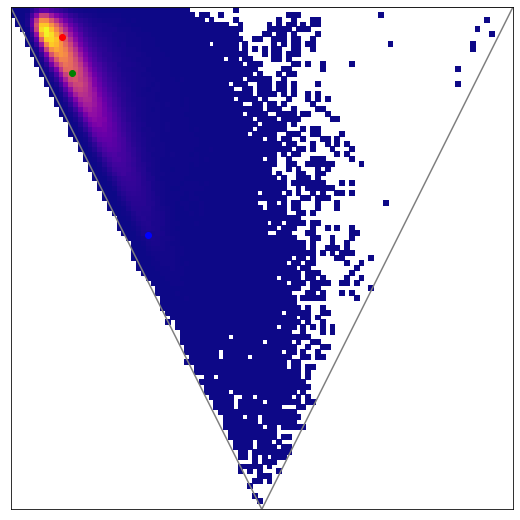

In [48]:
# import matplotlib.pyplot as plt
# do the amides overlay BUT plot the drugbank and GDB as separate density maps. 

fig, ax = plt.subplots(figsize=(18,18))
# fig, ax = plt.subplots(figsize=(10,10))
# norm=mpl.colors.LogNorm()
h = ax.hist2d(list(data_for2d.pmi_x), list(data_for2d.pmi_y),bins=100,cmin=1,cmap="plasma")


ax.set_xlim((0,1))
ax.set_ylim((0.5,1))
ax.plot([0,.5], [1,0.5],color='gray')
ax.plot([.5,1], [0.5,1],color='gray')
ax.plot([0,1], [1,1],color='gray')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
divider = make_axes_locatable(ax)

ax.set_xticks([])
ax.set_yticks([])
# cax = divider.append_axes("right", size="4%",pad=0.001)
# fig.colorbar(h[3],fraction=0.0235, pad=0.04)

# # gdb 4-8 atoms
# ax.scatter(data_for2d.pmi_x, data_for2d.pmi_y,color=(70/255,49/255,126/255,1))

# # drugbank
# ax.scatter(data_in_db.pmi_x,data_in_db.pmi_y,alpha=1,color=(42/255,118/255,142/255,1))

# # 320 previous molecules
# ax.scatter(data_for2d_320.pmi_x, data_for2d_320.pmi_y,color=(46/255,179/255,124/255,1))

# # the 4 amides 
ax.scatter(*acid_pmi,color="r")
ax.scatter(*amine_pmi,color="b")
ax.scatter(*amide_pmi,color="g")



# ax.legend(["","","","All","In Drugbank","In 320","Amides"])
# plt.title("acid-amine enumeration (209,054 structures)",fontsize=20)
# ax.grid(b=True, which='major', color='k', linestyle='--')
fig.savefig('fig3_1a.png', dpi=900)
# plt.close(fig)

In [35]:
data = []

In [36]:
dataS = pd.read_csv("pmi_ac3drug_am3small_small.csv")

In [37]:
dataS

,Unnamed: 0,rmat_tag,pdt_smiles,frag_in_large,pdt_cleaned,pmi_x,pmi_y
0,0,40950,[13C].[14C][18O][15N][17O][16C].[15C].[17C],[14C][18O][15N][17O][16C],CONOC,0.141543,0.925963
1,1,40962,[13C].[14C][18O][17C][15N][17O][16C].[15C],[14C][18O][17C][15N][17O][16C],COCNOC,0.147637,0.928097
2,2,40964,[13C].[14C][18O][15N][17C][17O][16C].[15C],[14C][18O][15N][17C][17O][16C],CONCOC,0.147637,0.928097
3,3,40965,[13C].[14C][18O][17C]([15N])[17O][16C].[15C],[14C][18O][17C]([15N])[17O][16C],COC(N)OC,0.393006,0.745270
4,4,40971,[13C].[14C][18O][17C]=[15N][17O][16C].[15C],[14C][18O][17C]=[15N][17O][16C],COC=NOC,0.158010,0.891778
...,...,...,...,...,...,...,...
916048,916048,54975523,[14C]=[13C]=[15C][16C][17C](=[15N])[18O][17O],[14C]=[13C]=[15C][16C][17C](=[15N])[18O][17O],C=C=CCC(=N)OO,0.208373,0.869834
916049,916049,54975525,[14C]=[13C]=[15C][16C][17C]([18O])=[15N][17O],[14C]=[13C]=[15C][16C][17C]([18O])=[15N][17O],C=C=CCC(O)=NO,0.293233,0.897413
916050,916050,54975527,[14C]=[13C]=[15C][16C][17C](=[15N])[17O].[18O],[14C]=[13C]=[15C][16C][17C](=[15N])[17O],C=C=CCC(=N)O,0.339516,0.948497
916051,916051,54975530,[14C]=[13C]=[15C][16C][17C]1=[15N][18O][17O]1,[14C]=[13C]=[15C][16C][17C]1=[15N][18O][17O]1,C=C=CCC1=NOO1,0.071444,0.942891


In [39]:
data_for2d = dataS[~dataS.pmi_x.isnull()]

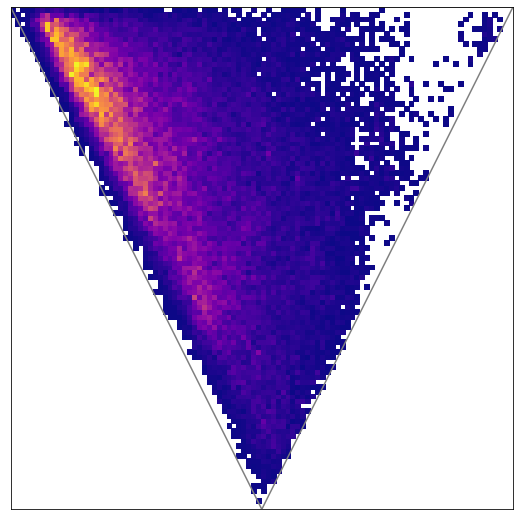

In [42]:
# import matplotlib.pyplot as plt
# do the amides overlay BUT plot the drugbank and GDB as separate density maps. 

fig, ax = plt.subplots(figsize=(18,18))
# fig, ax = plt.subplots(figsize=(10,10))
# norm=mpl.colors.LogNorm()
h = ax.hist2d(list(data_for2d.pmi_x), list(data_for2d.pmi_y),bins=100,cmin=1,cmap="plasma")


ax.set_xlim((0,1))
ax.set_ylim((0.5,1))
ax.plot([0,.5], [1,0.5],color='gray')
ax.plot([.5,1], [0.5,1],color='gray')
ax.plot([0,1], [1,1],color='gray')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
divider = make_axes_locatable(ax)



ax.set_xticks([])
ax.set_yticks([])
# cax = divider.append_axes("right", size="4%",pad=0.001)
# fig.colorbar(h[3],fraction=0.0235, pad=0.04)

# # gdb 4-8 atoms
# ax.scatter(data_for2d.pmi_x, data_for2d.pmi_y,color=(70/255,49/255,126/255,1))

# # drugbank
# ax.scatter(data_in_db.pmi_x,data_in_db.pmi_y,alpha=1,color=(42/255,118/255,142/255,1))

# # 320 previous molecules
# ax.scatter(data_for2d_320.pmi_x, data_for2d_320.pmi_y,color=(46/255,179/255,124/255,1))

# # the 4 amides 
# ax.scatter(*acid_pmi,color="r")
# ax.scatter(*amine_pmi,color="b")
# ax.scatter(*amide_pmi,color="g")



# ax.legend(["","","","All","In Drugbank","In 320","Amides"])
# plt.title("acid-amine enumeration (209,054 structures)",fontsize=20)
# ax.grid(b=True, which='major', color='k', linestyle='--')
fig.savefig('fig3_1b.png', dpi=900)
# plt.close(fig)